<a href="https://colab.research.google.com/github/anushka-dere/Neural-Network/blob/main/problem_statement(gas_turbine)_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import plot as off

from collections import Counter
sns.set_style('darkgrid')
from imblearn.pipeline import Pipeline 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split, RandomizedSearchCV

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier

Import Dataset:

In [ ]:
gas_turbine=pd.read_csv('/content/gas_turbines.csv')
gas_turbine

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


EDA:

Descriptive Analysis:

In [ ]:
gas_turbine.shape

(15039, 11)

In [ ]:
gas_turbine.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [ ]:
gas_turbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
gas_turbine.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
gas_turbine.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [ ]:
gas_turbine.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [ ]:
gas_turbine[gas_turbine.duplicated()].shape

(0, 11)

In [ ]:
gas_turbine[gas_turbine.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [ ]:
gas_turbine.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [ ]:
#it has been observed that the features are not on the same scale
#e.g. AP has a mean of 1013.19 and CO has a mean value of 1.97
#Features should be on the same scale for algorithms such as (gradient descent) to converge smoothly
# we will check further

In [ ]:
gas_turbine.corr()['TEY'].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [ ]:
numerical_features= gas_turbine.describe(include=['int64','float64']).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

Data Visualization

Univariate plots:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



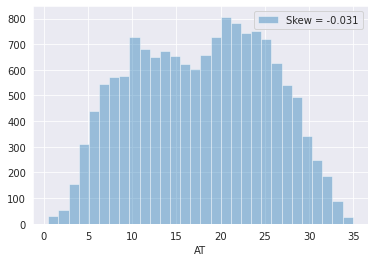

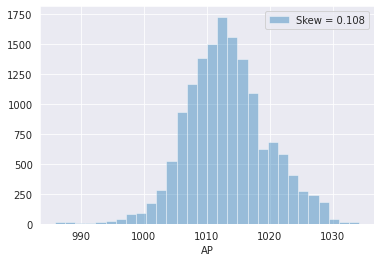

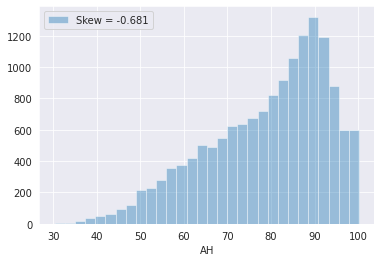

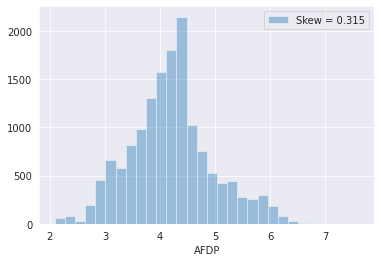

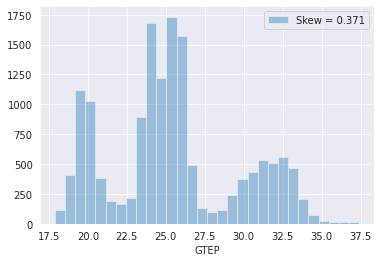

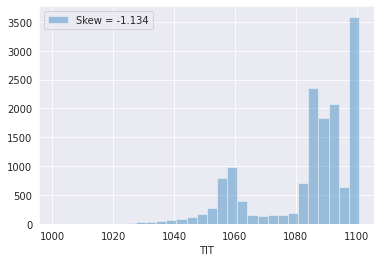

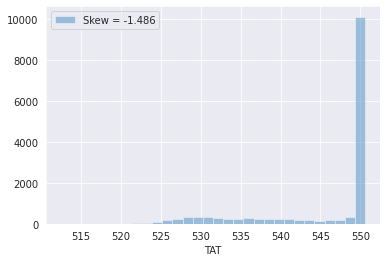

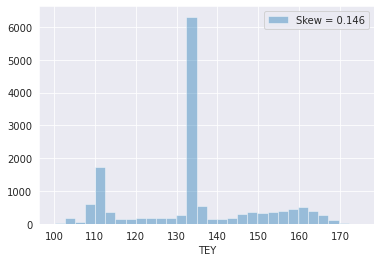

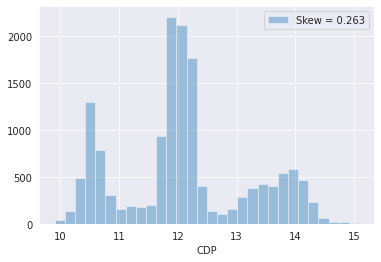

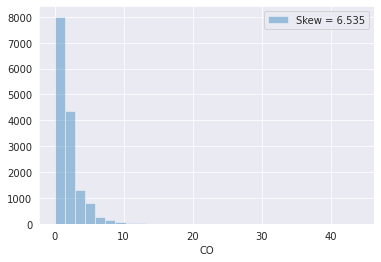

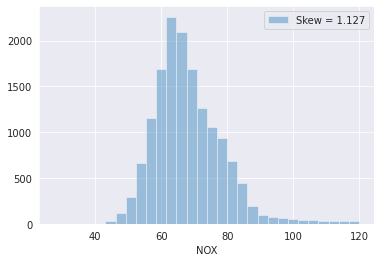

In [ ]:
numerical_features=[feature for feature in gas_turbine.columns if gas_turbine[feature].dtypes != '0']

for feat in numerical_features:
    skew = gas_turbine[feat].skew()
    sns.distplot(gas_turbine[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [ ]:
# from above plots, some of the features are normally distributed.
# the features AH, CO, TIT and TAT exhibit the highest skew coefficients
# distribution of Carbon Mono oxide(CO), turbine inlet temperature(TIT)
# lets identify the indices of the observations containing outliers using Turkey's method.

Turkey's Method

In [ ]:
def outlier_hunt(gas_turbine):
  """
  Take a dataframe df of features and returns a list of the indices
  corresponding to the observations containing more than 2 outliers.
  """
  outlier_indices=[]
  for col in gas_turbine.columns.tolist():
    Q1 = np.percentile(gas_turbine[col],25)
    Q3 = np.percentile(gas_turbine[col],75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
  
  outlier_list_col = gas_turbine[(gas_turbine[col]<Q1 - outlier_step)].index
  outlier_indices.extend(outlier_list_col)
  
  outlier_indices = Counter (outlier_indices)
  multiple_outliers = list(k for k, v in outlier_indices.items() if v>2)

  return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(gas_turbine[numerical_features]))))

The dataset contains 0 observations with more than 2 outliers


In [ ]:
# the datset contains 1543 observations with more than 2 outliers
# 1. still out dataset exists observations with multiple outliers
# 2. We will examine the boxplots for several distributions

In [ ]:
numerical_features

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

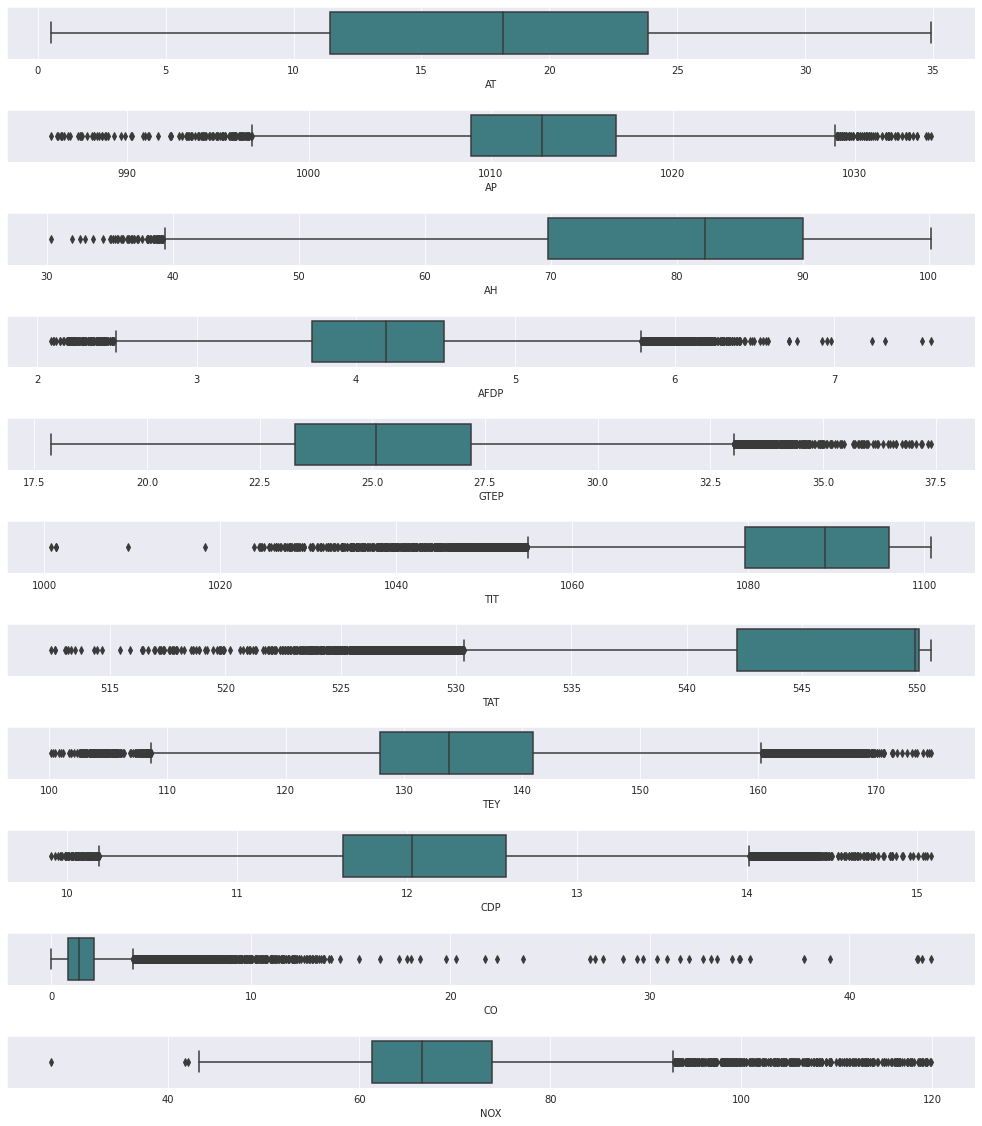

In [ ]:
outliers = gas_turbine.copy()
fig, axes = plt.subplots(11,1,figsize=(14,16),sharex=False, sharey=False)
sns.boxplot(x='AT', data=outliers,palette='crest',ax=axes[0])
sns.boxplot(x='AP', data=outliers,palette='crest',ax=axes[1])
sns.boxplot(x='AH', data=outliers,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP', data=outliers,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP', data=outliers,palette='crest',ax=axes[4])
sns.boxplot(x='TIT', data=outliers,palette='crest',ax=axes[5])
sns.boxplot(x='TAT', data=outliers,palette='crest',ax=axes[6])
sns.boxplot(x='TEY', data=outliers,palette='crest',ax=axes[7])
sns.boxplot(x='CDP', data=outliers,palette='crest',ax=axes[8])
sns.boxplot(x='CO', data=outliers,palette='crest',ax=axes[9])
sns.boxplot(x='NOX', data=outliers,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)
plt.show()

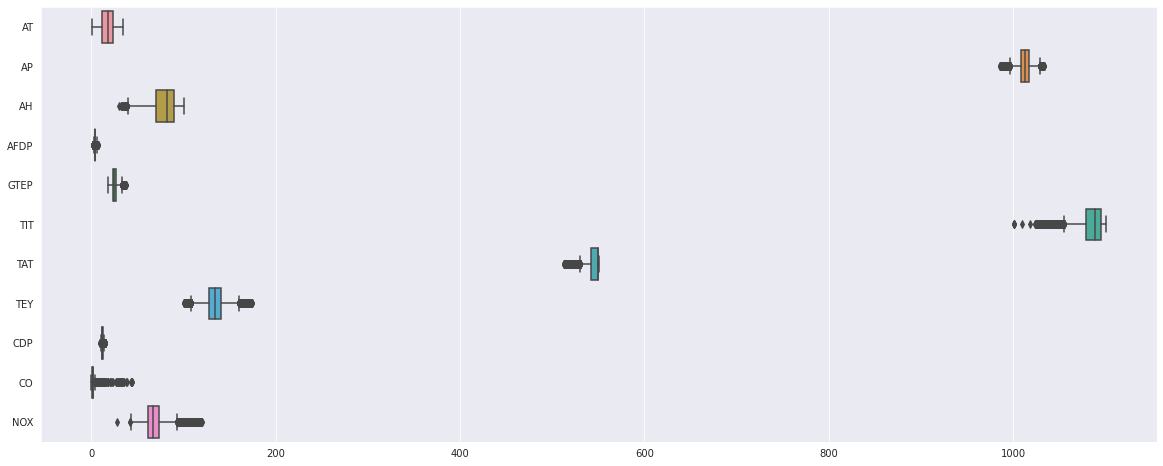

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data=gas_turbine[numerical_features], orient="h")
plt.show()

Text(0.5, 1.0, 'histogram of the target column')

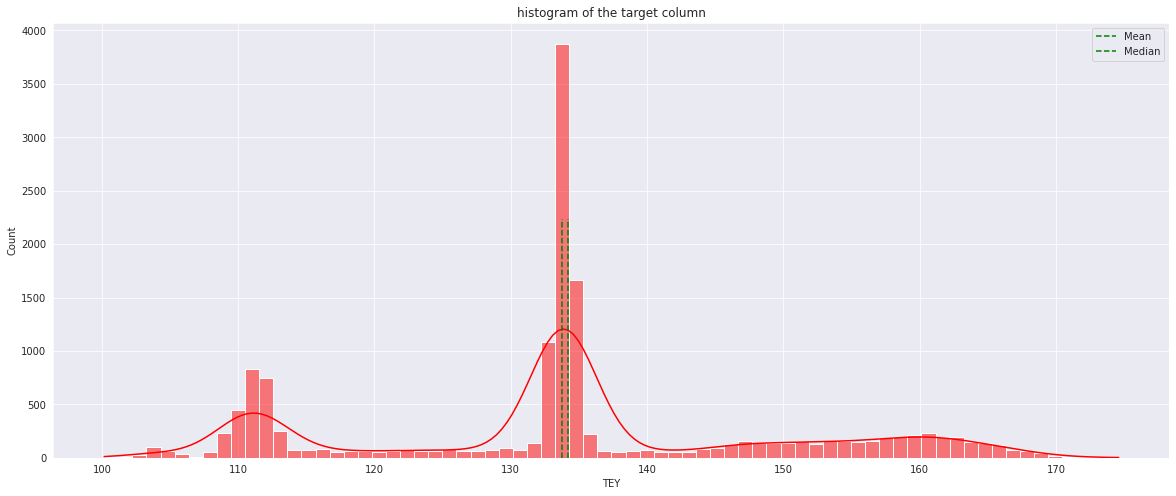

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,8))
sns.histplot(data=gas_turbine, x="TEY", color="red", kde=True)
plt.axvline(x=gas_turbine["TEY"].mean(),ymax=0.55,color='green',linestyle='--',label='Mean')
plt.axvline(x=gas_turbine["TEY"].median(),ymax=0.55,color='green',linestyle='--',label='Median')
plt.legend()
plt.title("histogram of the target column")

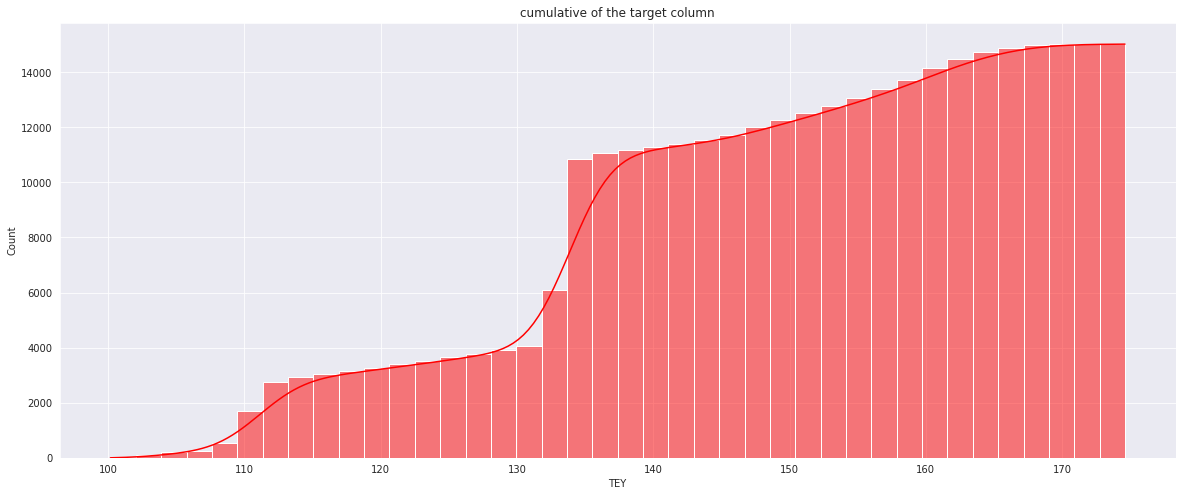

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(gas_turbine["TEY"],kde= True, bins =40, color='RED',cumulative=True)
plt.title('cumulative of the target column')
plt.show()

In [ ]:
# from above plot, mostly none of the features are on same scale as we already seen in previous plot

Multivariate analysis:

plotting pairplot to visually examine the correlation between the features

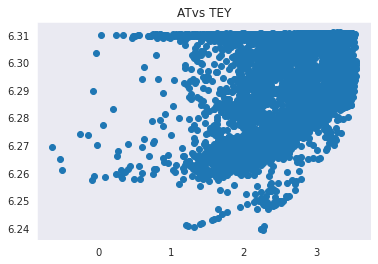

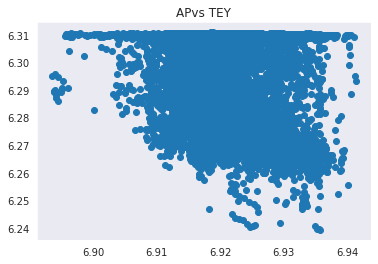

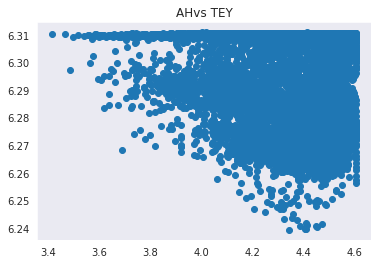

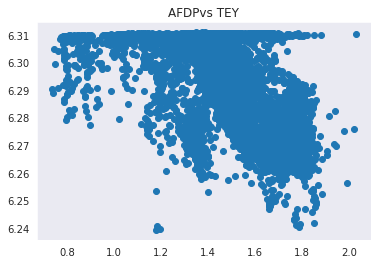

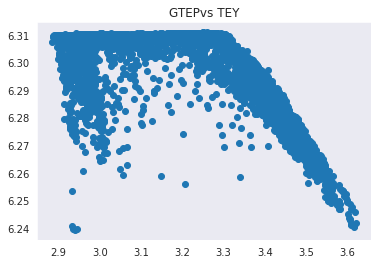

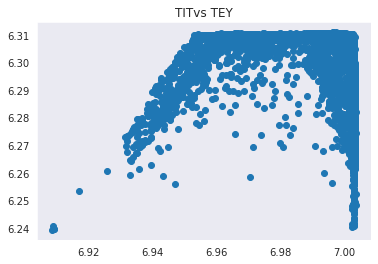

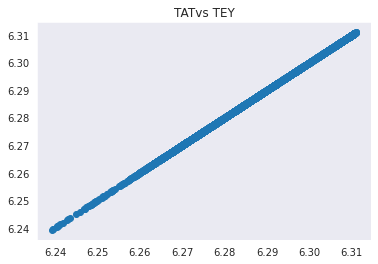

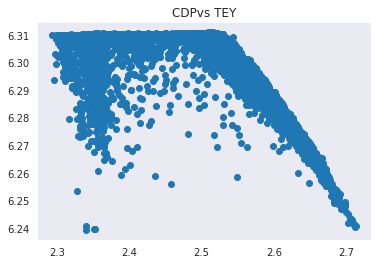

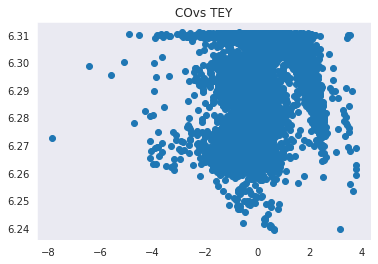

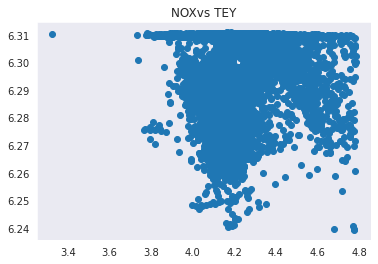

In [ ]:
for i in gas_turbine.columns:

  if i!="TEY":
    plt.scatter(np.log(gas_turbine[i]), np.log(gas_turbine['TAT']))
    plt.title(i+ 'vs TEY')
    plt.grid()
    plt.show()

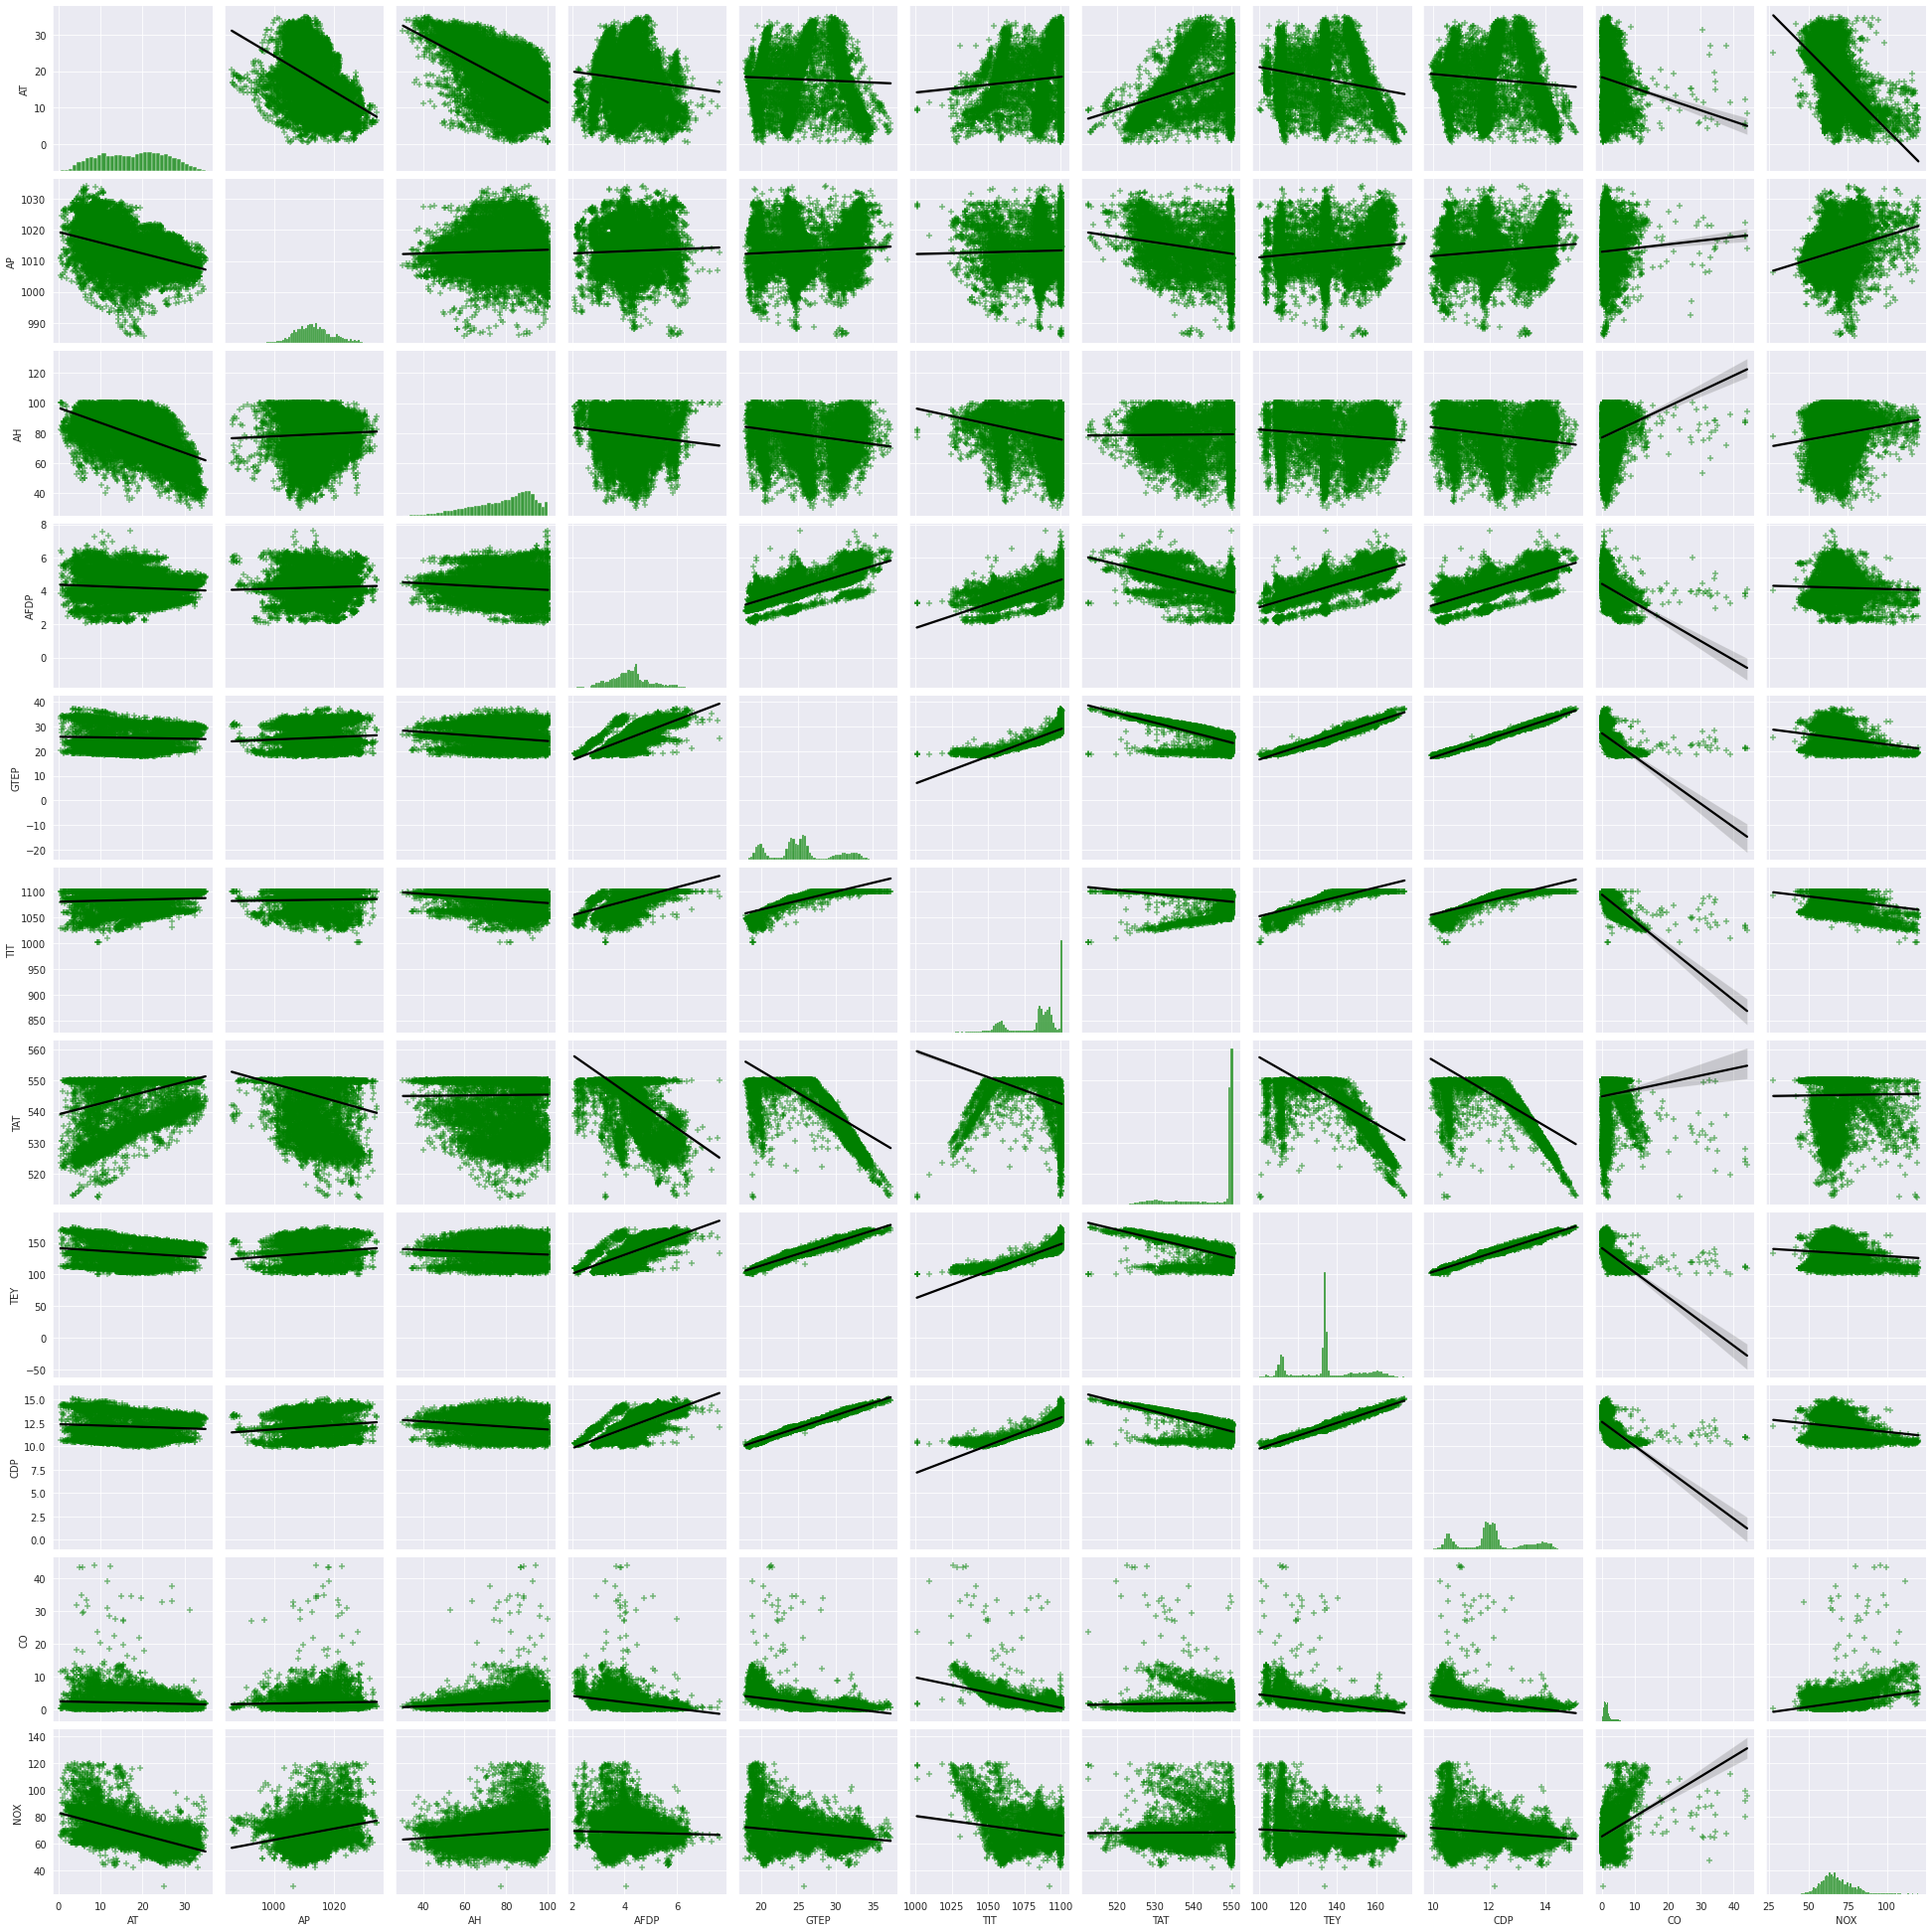

In [ ]:
sns.pairplot(gas_turbine,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'black'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': 'green'}},
               
                 diag_kws= {'color': 'green'})
plt.show()

<Figure size 1440x1440 with 0 Axes>

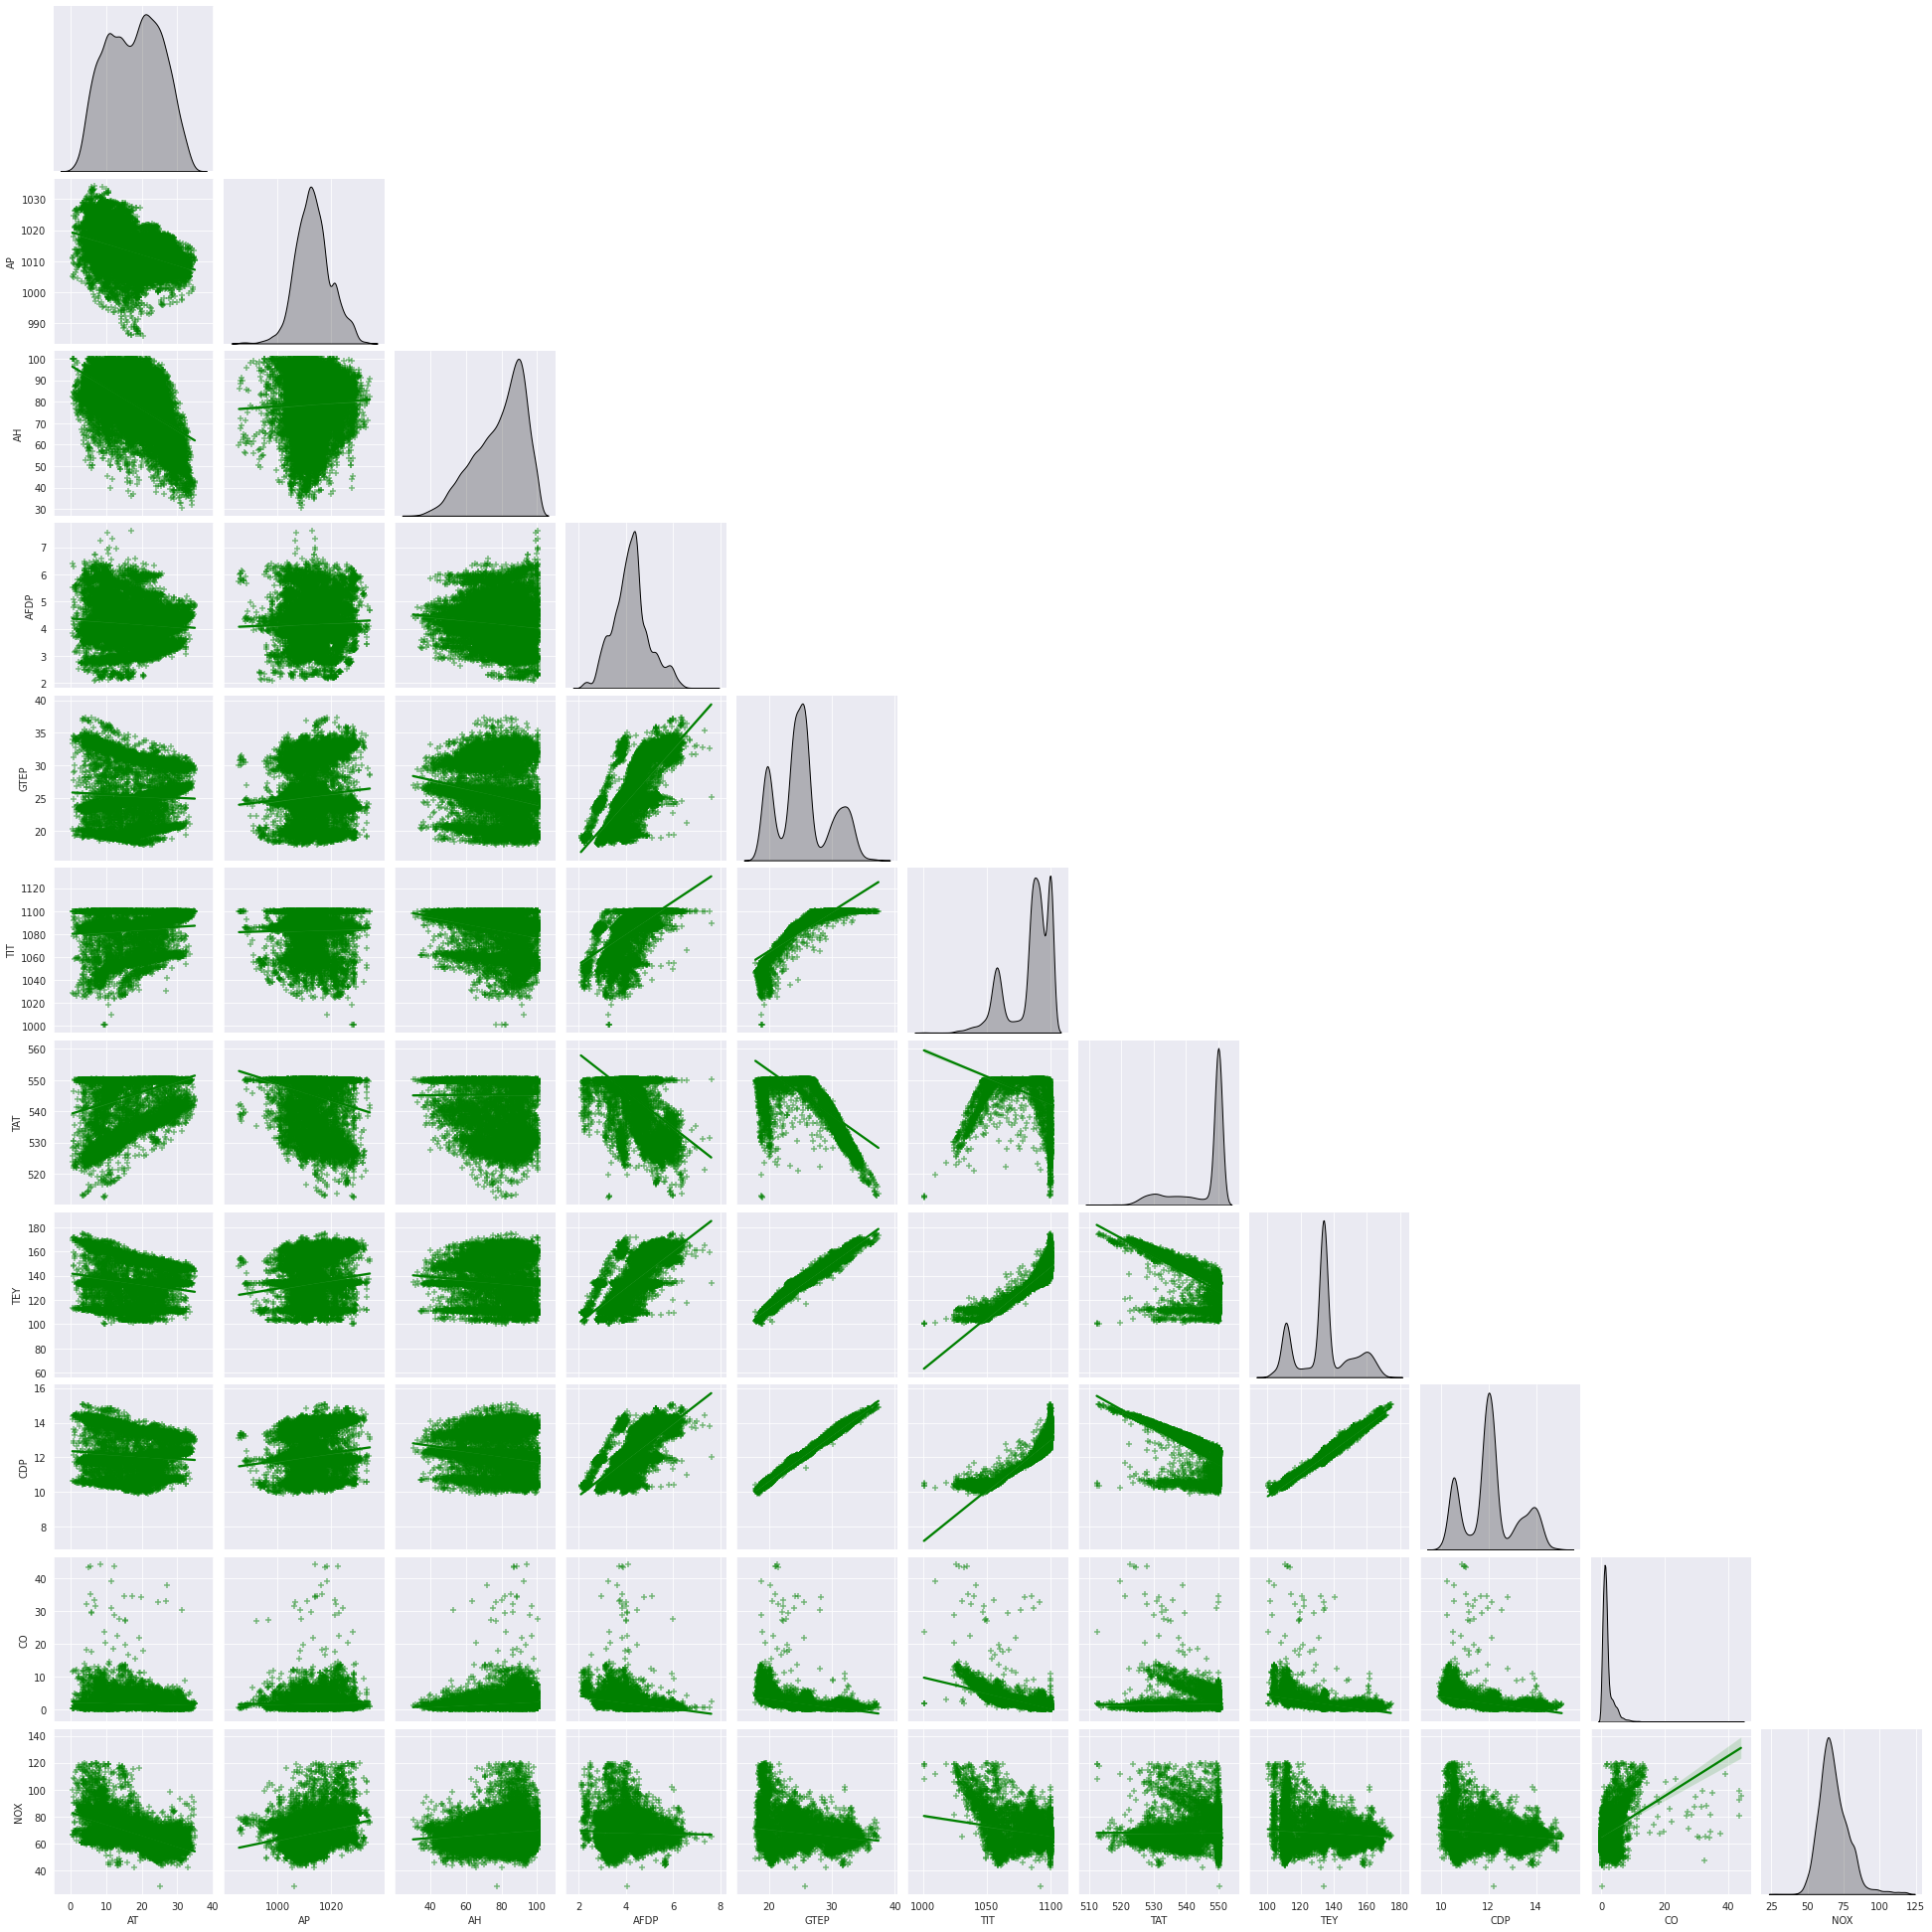

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(gas_turbine,
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'green'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': 'green'}},
               corner=True,
                 diag_kws= {'color': 'black'})
plt.show()

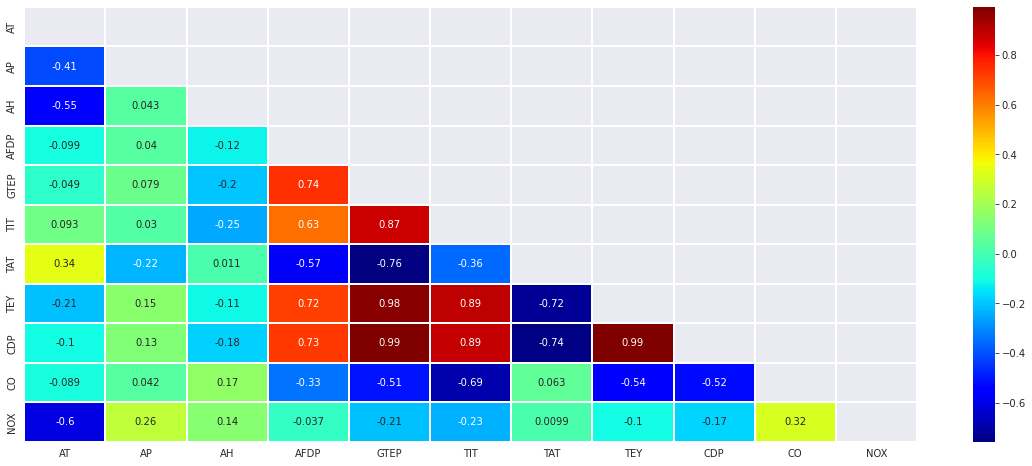

In [ ]:
plt.figure(figsize=(20,8))
mask = np.zeros_like(gas_turbine.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data=gas_turbine.corr(), cmap='jet', annot=True, linewidths=1,linecolor="white",mask=mask)
plt.show()

splitting in x and y

In [ ]:
x=gas_turbine.drop('TEY', axis=1)
y=gas_turbine[['TEY']]

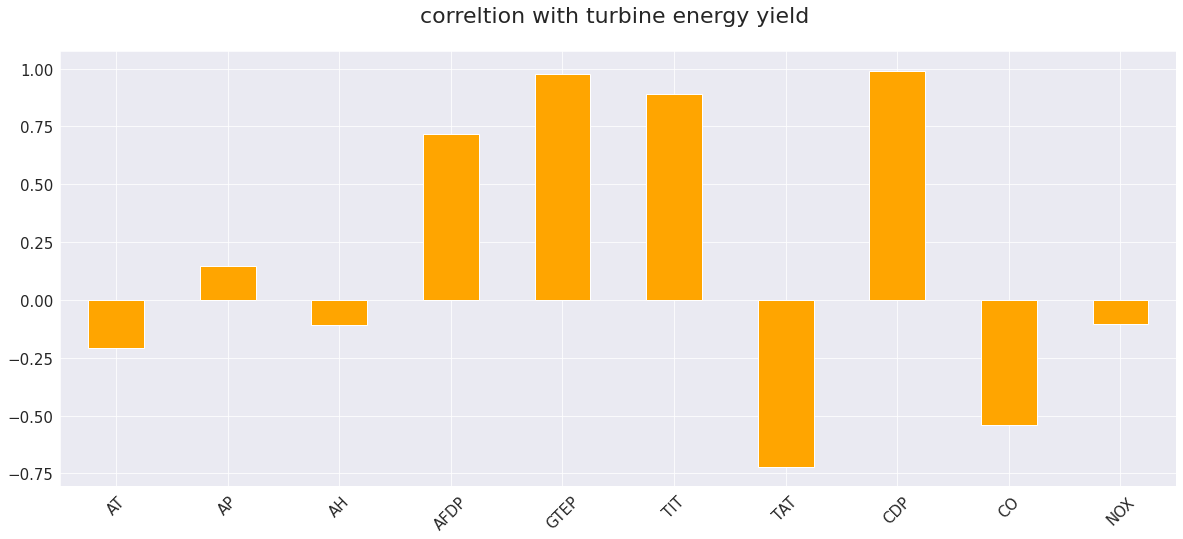

In [ ]:
data2 = gas_turbine.copy()

correlations = data2.corrwith(gas_turbine.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations>0].sort_values(ascending=False)
negative_correlations = correlations[correlations<0].sort_values(ascending=False)

correlations.plot.bar(
    figsize = (20,8),
    fontsize = 15,
    color = 'orange',
    rot = 45, grid=True)
plt.title('correltion with turbine energy yield \n',
          horizontalalignment = 'center', fontstyle='normal',
          fontsize = '22', fontfamily = 'sans-serif')
plt.show()

feature selection technique:

In [ ]:
from numpy import set_printoptions

In [ ]:
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
scores=fit.scores_
features = fit.transform(x)

In [ ]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
                        columns=['score','feature'])
score_df.sort_values(by='score',ascending=False, inplace = True)
score_df

,score,feature
7,1.713432,CDP
4,1.599728,GTEP
5,1.324798,TIT
6,0.893962,TAT
3,0.660622,AFDP
8,0.513334,CO
0,0.412230,AT
9,0.300337,NOX
1,0.139779,AP
2,0.097306,AH


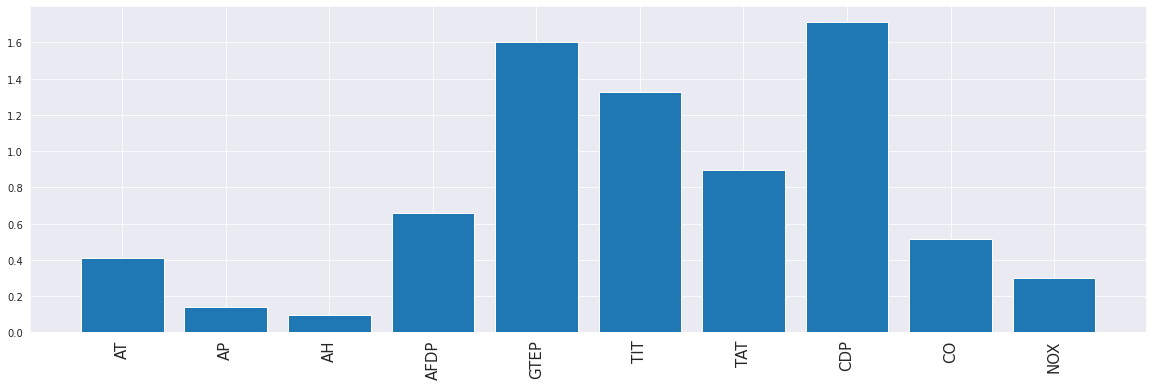

In [ ]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))], scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

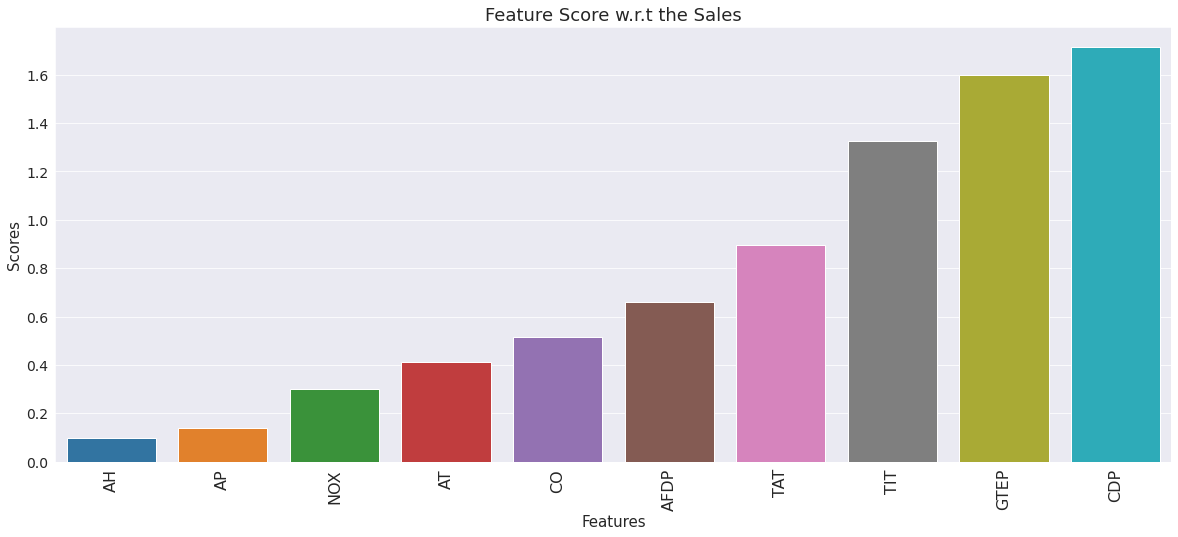

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='feature',
            y='score', 
            data=score_df, 
            order=score_df.sort_values('score').feature)

plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [ ]:
score_df.sort_values('score',ascending=False)

,score,feature
7,1.713432,CDP
4,1.599728,GTEP
5,1.324798,TIT
6,0.893962,TAT
3,0.660622,AFDP
8,0.513334,CO
0,0.412230,AT
9,0.300337,NOX
1,0.139779,AP
2,0.097306,AH


In [ ]:
model_data = gas_turbine[['CDP','GTEP','TIT','TAT','AFDP','CO','AT','TEY']]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


Data Pre-processing:

Standard Scaler:

In [ ]:
continuous_feature= [feature for feature in model_data.columns if model_data[feature].dtype!=0]
print('continuous feature count {}'.format(len(continuous_feature)))

continuous feature count 8


In [ ]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [ ]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909


In [ ]:
# now we will check the mean and standard deviation of out scaled data. it should have a mean = 0 and standard deviation = 1

In [ ]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 CDP     0.0
GTEP   -0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT      0.0
TEY     0.0
dtype: float64 
Standard Devaition 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64 1


train test splitwith imbalanced dataset:

In [ ]:
x= df_standard_scaled.drop('TEY',axis=1)
y= df_standard_scaled[['TEY']]

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3, random_state=42)

Hyperparameter Tuning:

Optimal learning rate, number of layers and neurons

In [ ]:
def build_model(hp):
  model = Sequential()
  for i in range(hp.Int('num_layers',2,20)):
    model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                        min_value=32,
                                        max_value=100,
                                        step=32),
                           activation = 'relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',[1e-2, 1e-3,1e-4])),
            loss='mean_absolute_error',
            metrics=['mean_absolute_error'])
    return model

In [ ]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(x_train, y_train, epochs=50,validation_data=(x_test, y_test))

Trial 5 Complete [00h 05m 22s]
val_mean_absolute_error: 0.024539563183983166

Best val_mean_absolute_error So Far: 0.024539563183983166
Total elapsed time: 00h 26m 30s


In [ ]:
tuner.results_summary()

Results summary
Results in project/Gas Turbine
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 16
units_0: 96
learning_rate: 0.001
Score: 0.024539563183983166
Trial summary
Hyperparameters:
num_layers: 6
units_0: 32
learning_rate: 0.001
Score: 0.026134946073095005
Trial summary
Hyperparameters:
num_layers: 16
units_0: 64
learning_rate: 0.01
Score: 0.0274560550848643
Trial summary
Hyperparameters:
num_layers: 11
units_0: 64
learning_rate: 0.01
Score: 0.027587115143736202
Trial summary
Hyperparameters:
num_layers: 11
units_0: 96
learning_rate: 0.01
Score: 0.02794145668546359


Optimal batch size, number of epochs

In [ ]:
def create_model():
  model1 = Sequential()
  model1.add(Dense(32, input_dim=7, activation = 'relu'))
  model1.add(Dense(64, activation = 'relu'))
  model1.add(Dense(96, activation = 'relu'))
  model1.add(Dense(32, activation = 'relu'))
  model1.add(Dense(64, activation = 'relu'))
  model1.add(Dense(96, activation = 'relu'))
  model1.add(Dense(32, activation = 'relu'))
  model1.add(Dense(64, activation = 'relu'))
  model1.add(Dense(64, activation = 'relu'))
  model1.add(Dense(units=1, activation = 'linear'))

  adam=Adam(learning_rate=0.001)
  model1.compile(loss='mean_absolute_error',optimizer = adam, metrics=['mean_absolute_error'])
  return model1

In [ ]:
model1 =KerasRegressor(build_fn=create_model, verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model1, param_grid=param_grid, cv=KFold(),verbose=10)

In [ ]:
grid_result = grid.fit(x_test, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.036 total time=  10.2s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.033 total time=  23.5s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.038 total time=  12.1s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.068 total time=   8.5s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.044 total time=   8.4s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ...batch_size=10, epochs=50;,

In [ ]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with {}'.format(mean,stdev,param))

Best -0.026711763069033622, using {'batch_size': 10, 'epochs': 200}
-0.043544065207242966,0.012818429574900394 with {'batch_size': 10, 'epochs': 10}
-0.03042260929942131,0.002697603588400952 with {'batch_size': 10, 'epochs': 50}
-0.030957076326012613,0.0039686066844693965 with {'batch_size': 10, 'epochs': 100}
-0.026711763069033622,0.0016200579409253503 with {'batch_size': 10, 'epochs': 200}
-0.03838752657175064,0.006182590132506841 with {'batch_size': 20, 'epochs': 10}
-0.03614537268877029,0.012046606139848051 with {'batch_size': 20, 'epochs': 50}
-0.029478565230965613,0.0018302106029054498 with {'batch_size': 20, 'epochs': 100}
-0.03088173344731331,0.003975722388146255 with {'batch_size': 20, 'epochs': 200}
-0.038648398220539094,0.005063801194030559 with {'batch_size': 40, 'epochs': 10}
-0.03410955108702183,0.008097470642676474 with {'batch_size': 40, 'epochs': 50}
-0.030256519466638564,0.0029054563069951197 with {'batch_size': 40, 'epochs': 100}
-0.02809804454445839,0.00154345786701

In [ ]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(32,input_dim=7,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(units=1,activation="linear"))
    
    adam=Adam(learning_rate=0.001)
    model2.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model2
  

In [ ]:
model2=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [ ]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END ............dropout_rate=0.0;, score=-0.027 total time=  49.7s
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END ............dropout_rate=0.0;, score=-0.029 total time=  49.9s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END ............dropout_rate=0.0;, score=-0.025 total time=  46.6s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END ............dropout_rate=0.0;, score=-0.030 total time=  47.6s
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END ............dropout_rate=0.0;, score=-0.029 total time=  52.1s
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END ............dropout_rate=0.1;, 

In [ ]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with {}'.format(mean,stdev,param))

Best -0.027876142784953116, using {'dropout_rate': 0.0}
-0.027876142784953116,0.001854245344690303 with {'dropout_rate': 0.0}
-0.03165386840701103,0.0028433933930449157 with {'dropout_rate': 0.1}
-0.0282771460711956,0.0015040549800283908 with {'dropout_rate': 0.2}
-0.0280974630266428,0.004815856708076323 with {'dropout_rate': 0.3}
-0.029560035839676858,0.002763872571164404 with {'dropout_rate': 0.4}
-0.03202759772539139,0.004848779638077994 with {'dropout_rate': 0.5}


Optimal activation function and kernel initializer

In [ ]:
def create_model():
  model3 = Sequential()
  model3.add(Dense(32, input_dim=7, activation = 'relu'))
  model3.add(Dropout(0.3))
  model3.add(Dense(64, activation = 'relu'))
  model3.add(Dropout(0.3))
  model3.add(Dense(96, activation = 'relu'))
  model3.add(Dropout(0.3))
  model3.add(Dense(32, activation = 'relu'))
  model3.add(Dropout(0.3))
  model3.add(Dense(64, activation = 'relu'))
  model3.add(Dropout(0.3))
  model3.add(Dense(96, activation = 'relu'))
  model3.add(Dropout(0.3))
  model3.add(Dense(32, activation = 'relu'))
  model3.add(Dropout(0.3))
  model3.add(Dense(64, activation = 'relu'))
  model3.add(Dropout(0.3))
  model3.add(Dense(64, activation = 'relu'))
  model3.add(Dropout(0.3))
  model3.add(Dense(units=1, activation = 'linear'))

  adam=Adam(learning_rate=0.001)
  model2.compile(loss='mean_absolute_error',optimizer = adam, metrics=['mean_absolute_error'])
  return model3

In [ ]:
model3=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=1)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid2 = GridSearchCV(estimator=model3, param_grid=param_grid,cv=KFold(),verbose=10)

In [ ]:
grid_result3 = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.030 total time=  11.4s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.046 total time=  11.4s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.039 total time=   8.4s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.034 total time=  11.4s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.059 total time=  11.4s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ...batch_size=10, epochs=50;,

In [88]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with {}'.format(mean,stdev,param))

Best -0.027415889129042626, using {'batch_size': 20, 'epochs': 200}
-0.04192071780562401,0.010199597804990596 with {'batch_size': 10, 'epochs': 10}
-0.035804057866334914,0.004971801047578391 with {'batch_size': 10, 'epochs': 50}
-0.033812516182661054,0.00763840052717298 with {'batch_size': 10, 'epochs': 100}
-0.028052489459514617,0.0012870941395086246 with {'batch_size': 10, 'epochs': 200}
-0.04075693339109421,0.009136261579474884 with {'batch_size': 20, 'epochs': 10}
-0.033460337296128274,0.005235165648191272 with {'batch_size': 20, 'epochs': 50}
-0.03238694928586483,0.005244867108968399 with {'batch_size': 20, 'epochs': 100}
-0.027415889129042626,0.0017775074404659445 with {'batch_size': 20, 'epochs': 200}
-0.04059342220425606,0.006719708254280746 with {'batch_size': 40, 'epochs': 10}
-0.02830076515674591,0.001266836193484062 with {'batch_size': 40, 'epochs': 50}
-0.034187819436192514,0.005419821506284828 with {'batch_size': 40, 'epochs': 100}
-0.029806236550211907,0.0021448285623084

Model bulding neural networks:

standardizing only predictor variable - after train test spli


In [89]:
model_data

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72
...,...,...,...,...,...,...,...,...
15034,10.400,19.164,1049.7,546.21,3.5421,4.5186,9.0301,111.61
15035,10.433,19.414,1046.3,543.22,3.5059,4.8470,7.8879,111.78
15036,10.483,19.530,1037.7,537.32,3.4770,7.9632,7.2647,110.19
15037,10.533,19.377,1043.2,541.24,3.4486,6.2494,7.0060,110.74


In [95]:
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # Scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test)   # Scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [96]:
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Epoch 1/100
169/169 [==============================] - 3s 8ms/step - loss: 17610.5137 - mae: 131.7362 - mse: 17610.5137 - val_loss: 16762.9121 - val_mae: 128.5101 - val_mse: 16762.9121
Epoch 2/100
169/169 [==============================] - 1s 8ms/step - loss: 16268.4395 - mae: 126.5508 - mse: 16268.4395 - val_loss: 15713.4043 - val_mae: 124.3599 - val_mse: 15713.4043
Epoch 3/100
169/169 [==============================] - 1s 6ms/step - loss: 15296.0752 - mae: 122.6471 - mse: 15296.0752 - val_loss: 14797.4424 - val_mae: 120.6210 - val_mse: 14797.4424
Epoch 4/100
169/169 [==============================] - 0s 3ms/step - loss: 14413.0420 - mae: 118.9967 - mse: 14413.0420 - val_loss: 13946.0088 - val_mae: 117.0385 - val_mse: 13946.0088
Epoch 5/100
169/169 [==============================] - 0s 3ms/step - loss: 13585.5225 - mae: 115.4669 - mse: 13585.5225 - val_loss: 13143.0459 - val_mae: 113.5564 - val_mse: 13143.0459
Epoch 6/100
169/169 [==============================] - 0s 3ms/step - loss: 

In [99]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):
            
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
     
    bestParamTable = pd.DataFrame()

    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            model = Sequential()
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
            model.add(Dense(1, kernel_initializer='normal'))
            model.compile(optimizer ='adam', loss = 'mean_squared_error')
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)                 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))                     
            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))            

            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)
    return bestParamTable

finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

94/94 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 5 Accuracy: TEY    97.451604
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 10 Accuracy: TEY    99.607296
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 50 Accuracy: TEY    99.611229
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 100 Accuracy: TEY    99.656375
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 5 Accuracy: TEY    81.063089
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 10 Accuracy: TEY    98.093075
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.675646
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.688895
dtype: float64
94/94 [=============

,batchsize,epochs,Accuracy
0,5,5,TEY 97.451604 dtype: float64
0,5,10,TEY 99.607296 dtype: float64
0,5,50,TEY 99.611229 dtype: float64
0,5,100,TEY 99.656375 dtype: float64
0,10,5,TEY 81.063089 dtype: float64
0,10,10,TEY 98.093075 dtype: float64
0,10,50,TEY 99.675646 dtype: float64
0,10,100,TEY 99.688895 dtype: float64
0,15,5,TEY 58.68664 dtype: float64
0,15,10,TEY 89.844762 dtype: float64


training Model-using best params:

In [102]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

model.fit(x_train_scaled,y_train, batch_size=20 , epochs = 50, verbose=0)

In [103]:
model

model evaluation train and test error:

predicting values from model using same dataset:

In [105]:
y_predict_test = model.predict(x_test_scaled) 

predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 1ms/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,134.714508
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,112.781013
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,134.178207
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,133.982498
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,111.497643
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,113.820770
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,133.796555
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,129.199371
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,160.709961
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,160.583084


In [106]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)

calculating absolute percent error and error

In [107]:
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.61972167172901


,Actual,Predicted,APE %
13312,134.46,134.714508,0.189282
12627,111.88,112.781013,0.805339
6393,133.72,134.178207,0.342662
4990,133.79,133.982498,0.143881
12462,110.77,111.497643,0.656895


In [108]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,Actual,Predicted,APE %,Error
0,134.46,134.714508,0.189282,-0.001893
1,111.88,112.781013,0.805339,-0.008053
2,133.72,134.178207,0.342662,-0.003427
3,133.79,133.982498,0.143881,-0.001439
4,110.77,111.497643,0.656895,-0.006569
...,...,...,...,...
3003,119.25,120.136642,0.743516,-0.007435
3004,133.74,134.183578,0.331672,-0.003317
3005,146.31,146.872253,0.384289,-0.003843
3006,150.07,149.169891,0.599793,0.005998


visualizing the relationship between the actual and predicted values model validation:

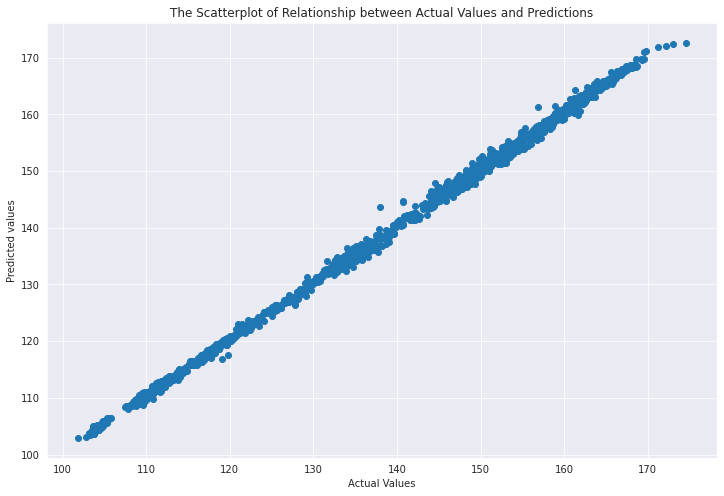

In [109]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [110]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 0.5039284149129343
MSE: 0.42558844511654675
RMSE: 0.6523714012098835


In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled) 
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 1s 1ms/step
R2_score (train):  0.998744438255998
R2_score (test):  0.9983002951600443


In [112]:
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2)))

This shows our model predict % 99.88 of the target correctly


Residual analysis:

test for normality of residuals(Q-Q plot):

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



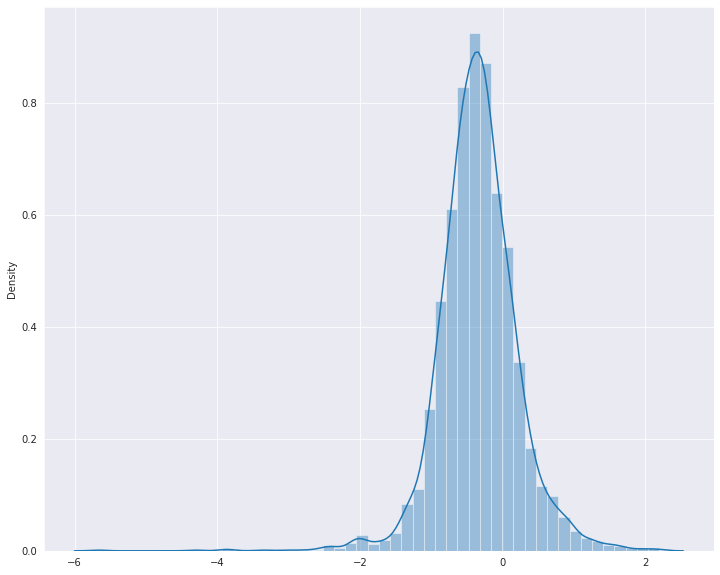

In [113]:
plt.figure(figsize=(12,10))
sns.distplot(y_test-y_predict_test,bins=50) 

Text(0.5, 1.0, 'Normal Q-Q plot of residuals')

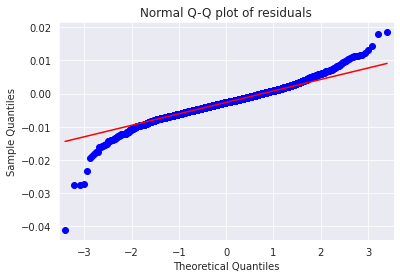

In [114]:
import statsmodels.api as smf
smf.qqplot(predictions_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')

In [115]:
# Observation
# error should have normal/Gaussian distribution ~ N(0,1) 
# and independently and identically distribitted